In [1]:
# -*- coding: utf-8 -*-

# -------------------------------------------------------------------------
"""
This code is for personal use.

"""
# Copyright by Lin Lu 2017
# version control


__author__ = 'sn0wfree'
__version__ = '0.02'


import datetime

import pandas as pd
import xlrd

%pylab inline

Populating the interactive namespace from numpy and matplotlib


/Users/sn0wfree/anaconda2/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['__version__']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [49]:
class TaxCal():

    def __init__(self,  TaxTable,memberdict):
        #{name:(salary,bonus)}
        self.salaryandbonus = memberdict
        self.salarydiv = 3
        self.initlevel=0
        self.taxlevel=0
        self.top=0
        

        self.TaxTable = TaxTable
        self.Taxindex = zip(list(TaxTable['index_bottom']),list(TaxTable['index_top']))
    def mappingtax(self,salary,bonus,jd):
        a=0
        tax=self.CalTax(salary+bonus/3)*2+self.CalTax(salary+bonus-bonus/3-bonus/3)
        comp=(salary+bonus/3,salary+bonus/3,salary+bonus-bonus/3-bonus/3)

        t=int(bonus/3)
        while a<=t:
            for b in xrange(t,int(bonus-a),jd):
                temp =self.CalTax(a+salary)+self.CalTax(b+salary)+self.CalTax(bonus-a-b+salary) 
                if temp<tax:
                    print temp
                    tax=temp
                    comp=(a+salary,b+salary,bonus-a-b+salary)
                else:
                    pass
            a+=jd
        return tax,comp

       
       

    def CalTax(self, wage):
        temp='empty'
        taxabelewage=wage-self.initlevel
        for i in xrange(len(self.Taxindex)):
            if self.Taxindex[i][0]<=taxabelewage<self.Taxindex[i][1]:
                #self.taxlevel=list(self.TaxTable[self.TaxTable.index_bottom==self.Taxindex[i][0]]['level'])[0]
                #self.top=list(self.TaxTable[self.TaxTable.index_bottom==self.Taxindex[i][0]]['index_top'])[0]
                TaxRate=list(self.TaxTable[self.TaxTable.index_bottom==self.Taxindex[i][0]]['TaxRate'])[0]
                QuickCalculationDeduction =list(self.TaxTable[self.TaxTable.index_bottom==self.Taxindex[i][0]]['QuickCalculationDeduction'])[0]
                #trqcd=self.TaxTable[self.TaxTable.index==self.Taxindex[i]][['TaxRate','QuickCalculationDeduction']]
                temp='found taxlevel %d'%self.taxlevel
                tax =taxabelewage*TaxRate-QuickCalculationDeduction
               
                    
                return tax
            
        if temp == 'empty' and taxabelewage >80000:
            TaxRate=0.45
            QuickCalculationDeduction=13505
            tax =taxabelewage*TaxRate-QuickCalculationDeduction
            temp='found taxlevel 7'
            #self.top=100000000
            self.taxlevel=7
            return tax
        elif taxabelewage<0:
            self.taxlevel=1
            self.top=1500
            
            return 0
        else:
            print taxabelewage
            raise ValueError,'UnKnown Value'
               
        

In [50]:
Salary_file = pd.ExcelFile("Salary.xlsx")
SalaryBonus=Salary_file.parse('Salary+Bonus')
tt = TaxCal(Salary_file.parse('TaxTable'),96000)
print tt.TaxTable

  Symbol  index_bottom              index_top  level            全月应纳税所得额  \
0     <=             0                   1500      1           不超过1500元的   
1     <=          1500                   4500      2    超过1500元至4500元的部分   
2     <=          4500                   9000      3    超过4500元至9000元的部分   
3     <=          9000                  35000      4   超过9000元至35000元的部分   
4     <=         35000                  55000      5  超过35000元至55000元的部分   
5     <=         55000                  80000      6  超过55000元至80000元的部分   
6      >         80000  100000000000000000000      7         超过80000元的部分   

   TaxRate  QuickCalculationDeduction  
0     0.03                          0  
1     0.10                        105  
2     0.20                        555  
3     0.25                       1005  
4     0.30                       2755  
5     0.35                       5505  
6     0.45                      13505  


In [88]:
#
salary=30854.55
bonus=20000
tax,(a,b,c)=tt.mappingtax(salary,bonus,100)
print tax,(a,b,c)
print tt.CalTax(salary+bonus/3)*2+tt.CalTax(salary+bonus-bonus/3-bonus/3)

25504.095 (37520.55, 37520.55, 37522.55)
25504.095


In [73]:
SalaryBonus=Salary_file.parse('Salary+Bonus').set_index('index')

TypeError: 'Int64Index' object is not callable

In [89]:
taxlist=[]
taxdist1=[]
taxdist2=[]
taxdist3=[]
for i in xrange(SalaryBonus.shape[0]):
    Bonus =SalaryBonus.iloc[i]['BonusAmount'] 
    Salary =SalaryBonus.iloc[i]['Salary']
    tax,(a,b,c)=tt.mappingtax(salary,bonus,100)
    taxlist.append(tax)
    taxdist1.append(a)
    taxdist2.append(b)
    taxdist3.append(c)
    
SalaryBonus['tax']=taxlist
SalaryBonus['M1'] =taxdist1
SalaryBonus['M2'] =taxdist2
SalaryBonus['M3'] =taxdist3 

SalaryBonus.to_csv('output.csv')

KeyboardInterrupt: 

16290.915000000001

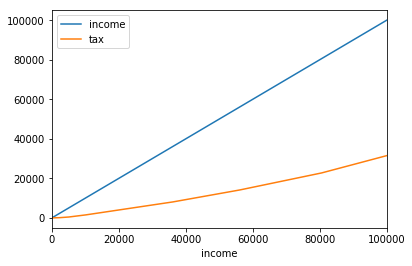

23